# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# Step 1

Importing Data

In [5]:
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Step 2 Performaing EDA on Data

# Renaming Columns

In [6]:
df1=df.rename({"Delivery Time": "delivery_time", "Sorting Time": "sorting_time"}, axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Checking the data type

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [8]:
df1.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Checking Null Values

In [9]:
df1.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

# Checking the duplicate values

In [10]:
df1.duplicated().sum()

0

# Step 3. Ploting the data to check for the outliers.

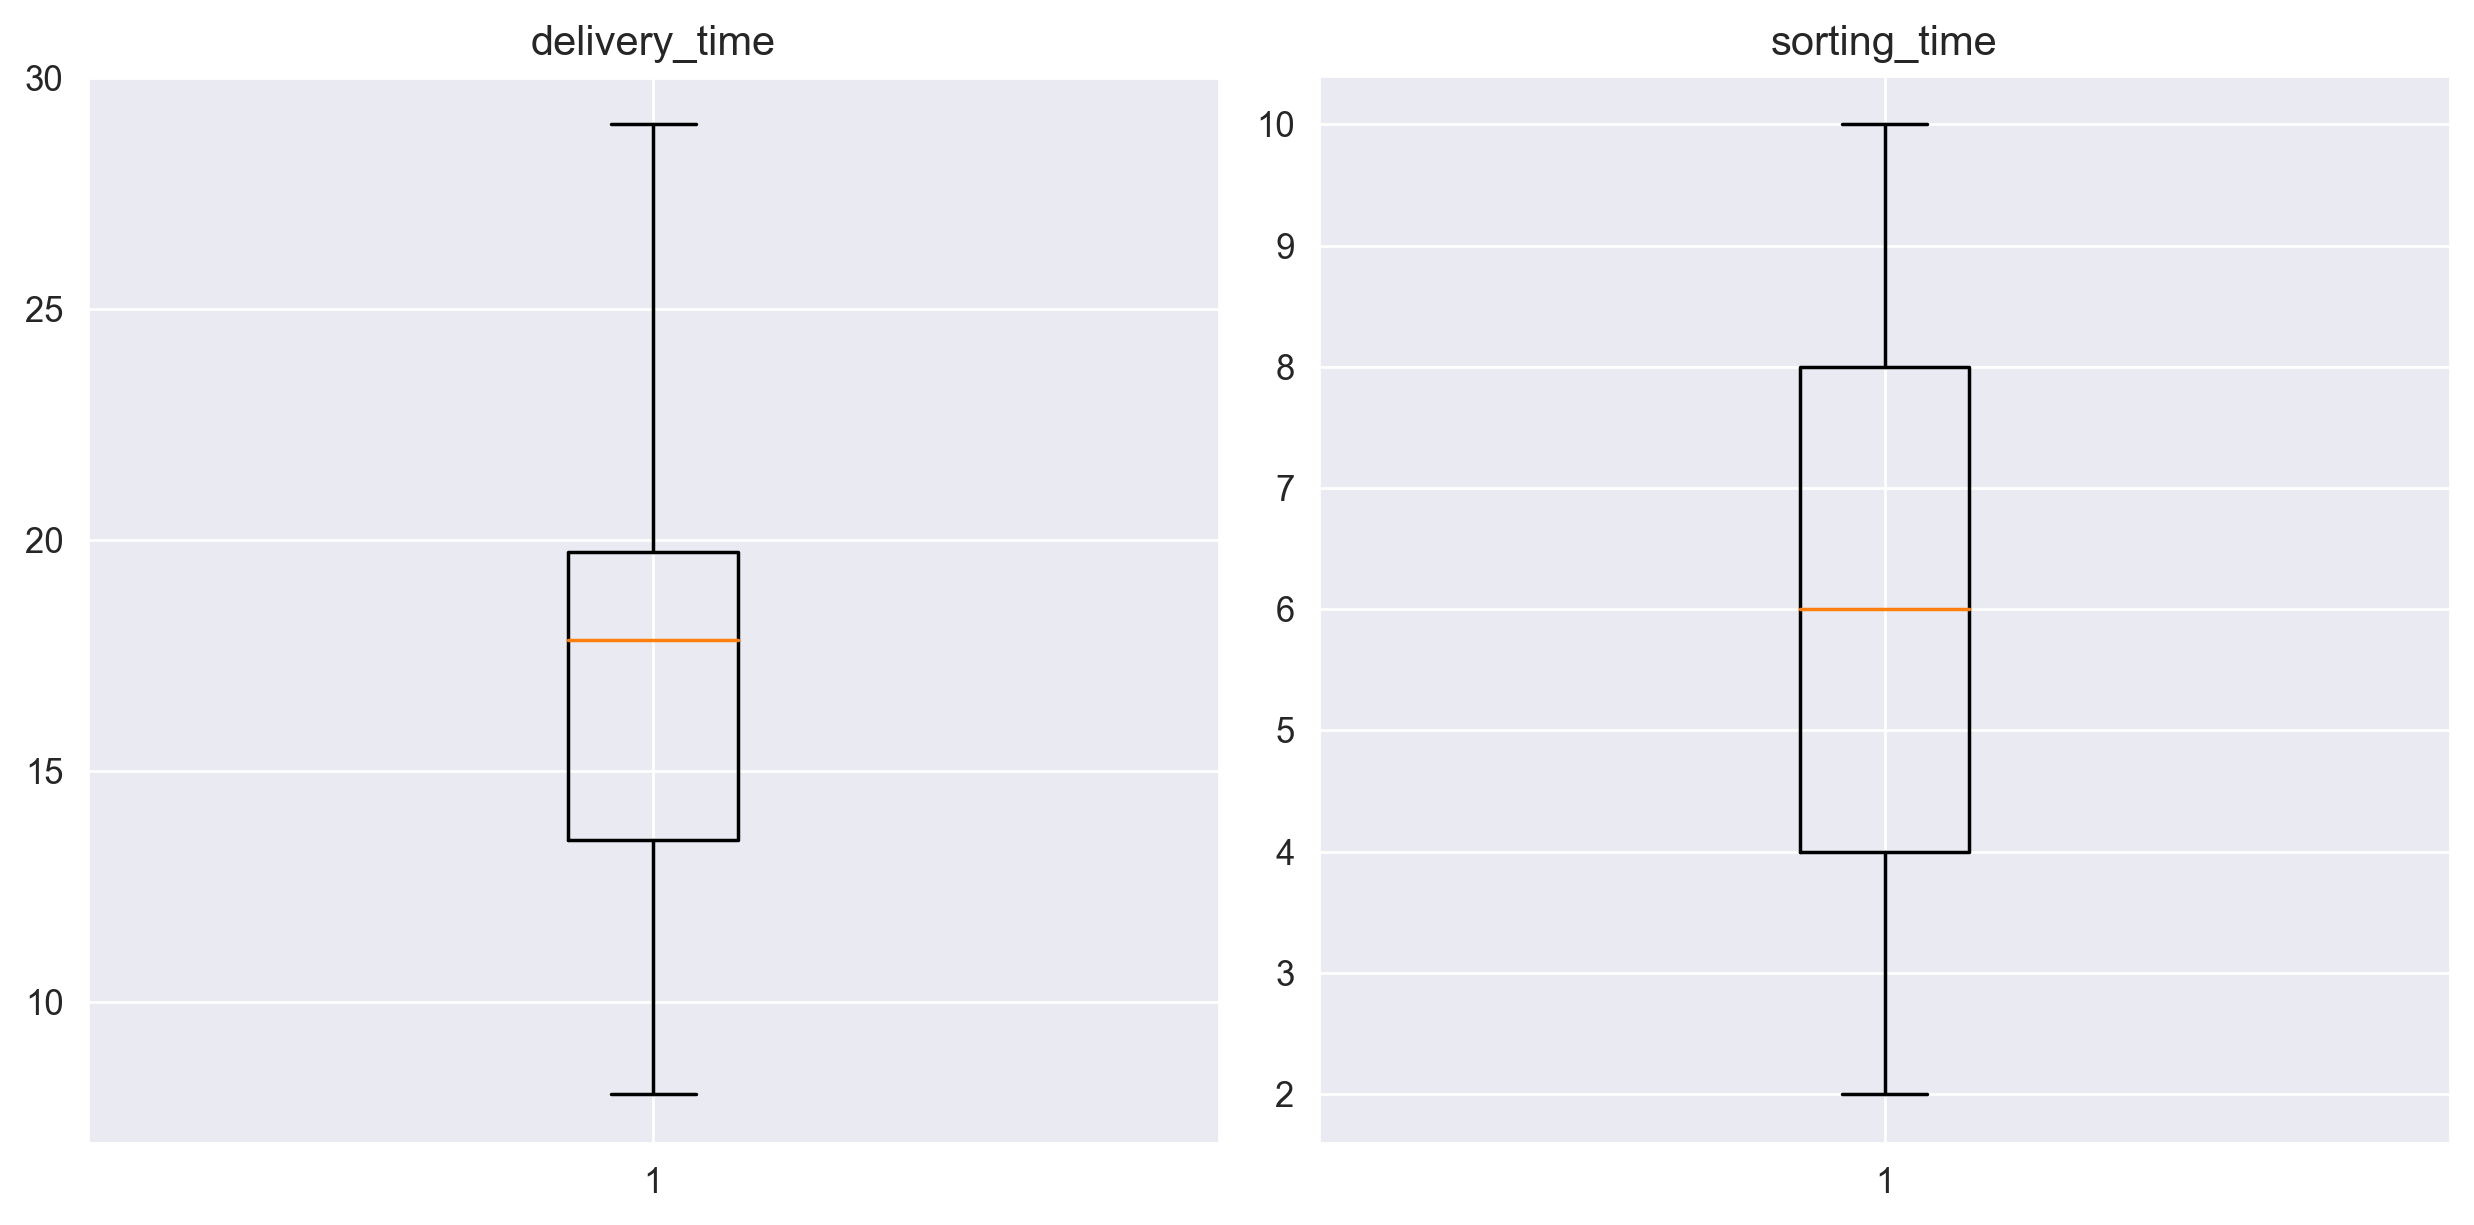

In [11]:
plt.subplot(1,2,1)
plt.boxplot(df1['delivery_time'])
plt.title('delivery_time')

plt.subplot(1,2,2)
plt.boxplot(df1['sorting_time'])
plt.title('sorting_time')

plt.tight_layout();

# As you can see there are no Outliers in the data

# Step 4. Checking the Correlation between the variable

In [12]:
df1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


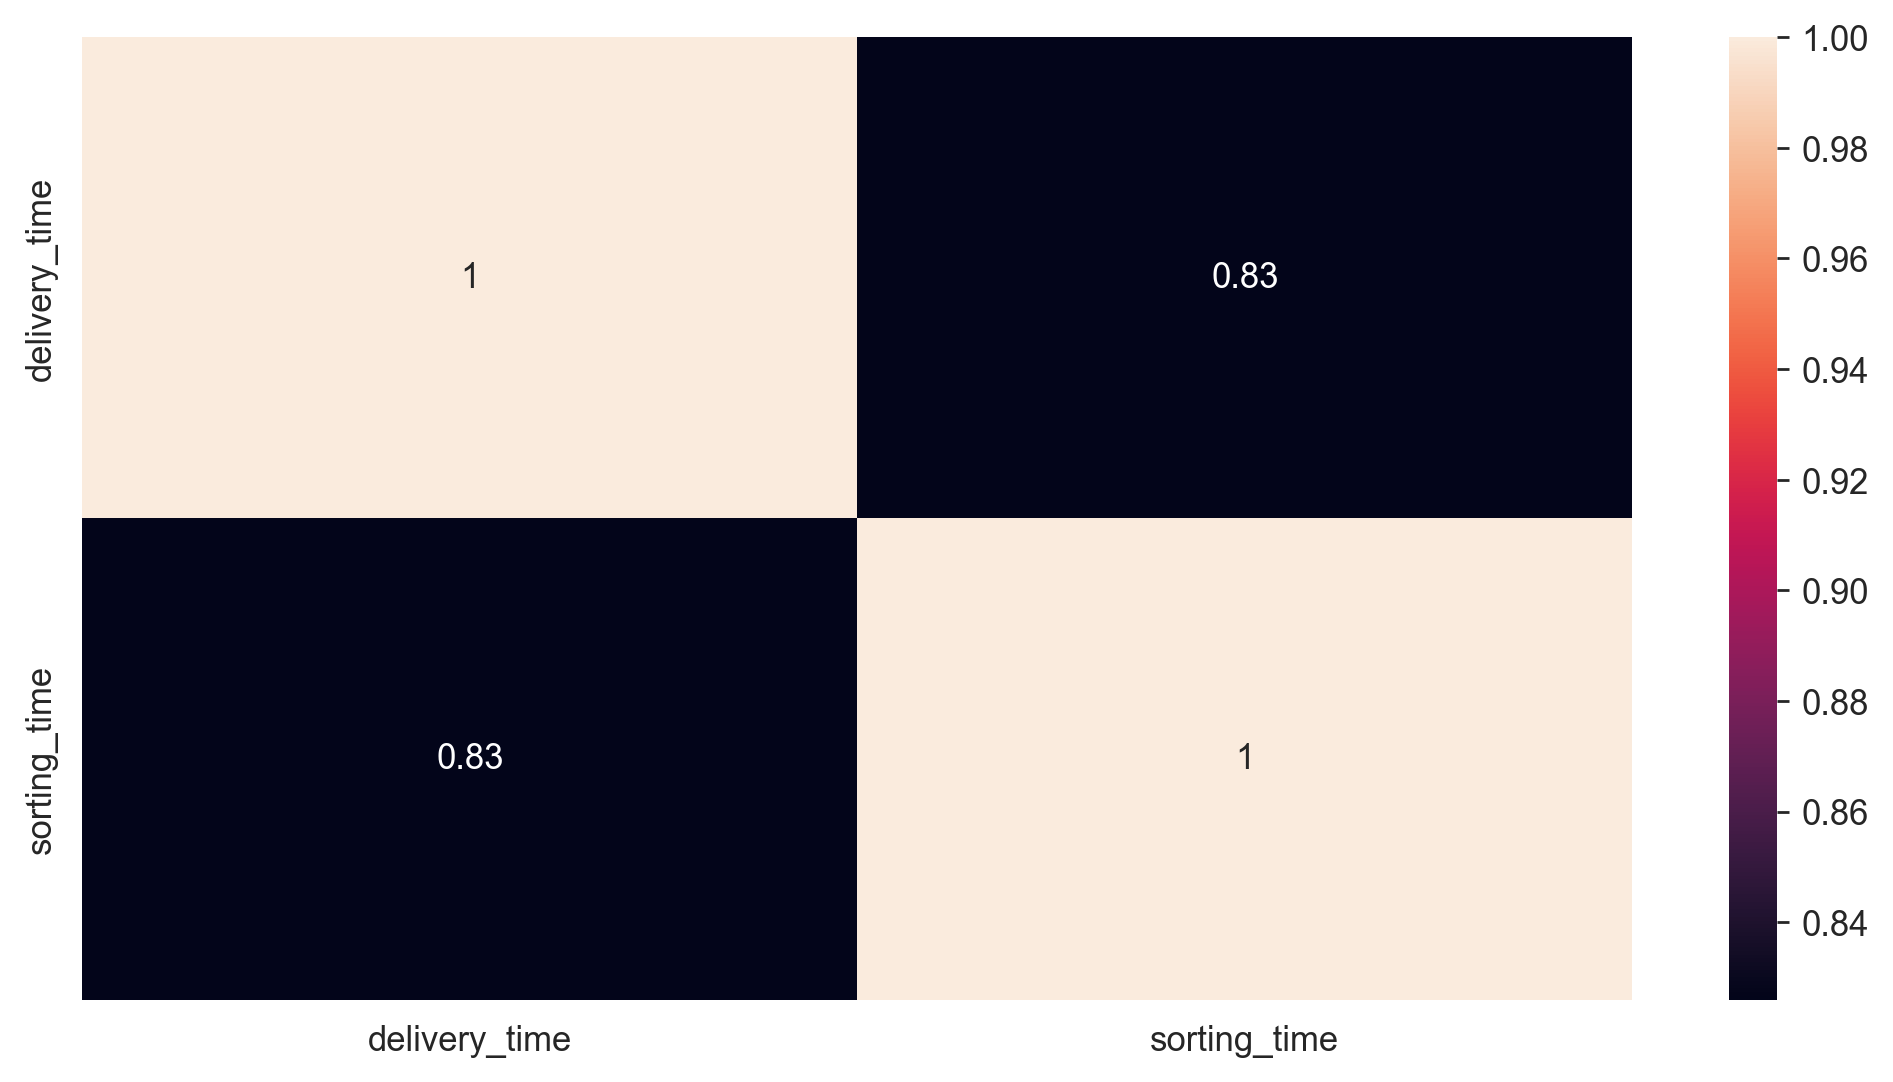

In [13]:
sns.heatmap(df1.corr(),annot=True);

# Visualization of Correlation beteen x and y
regplot = regression plot

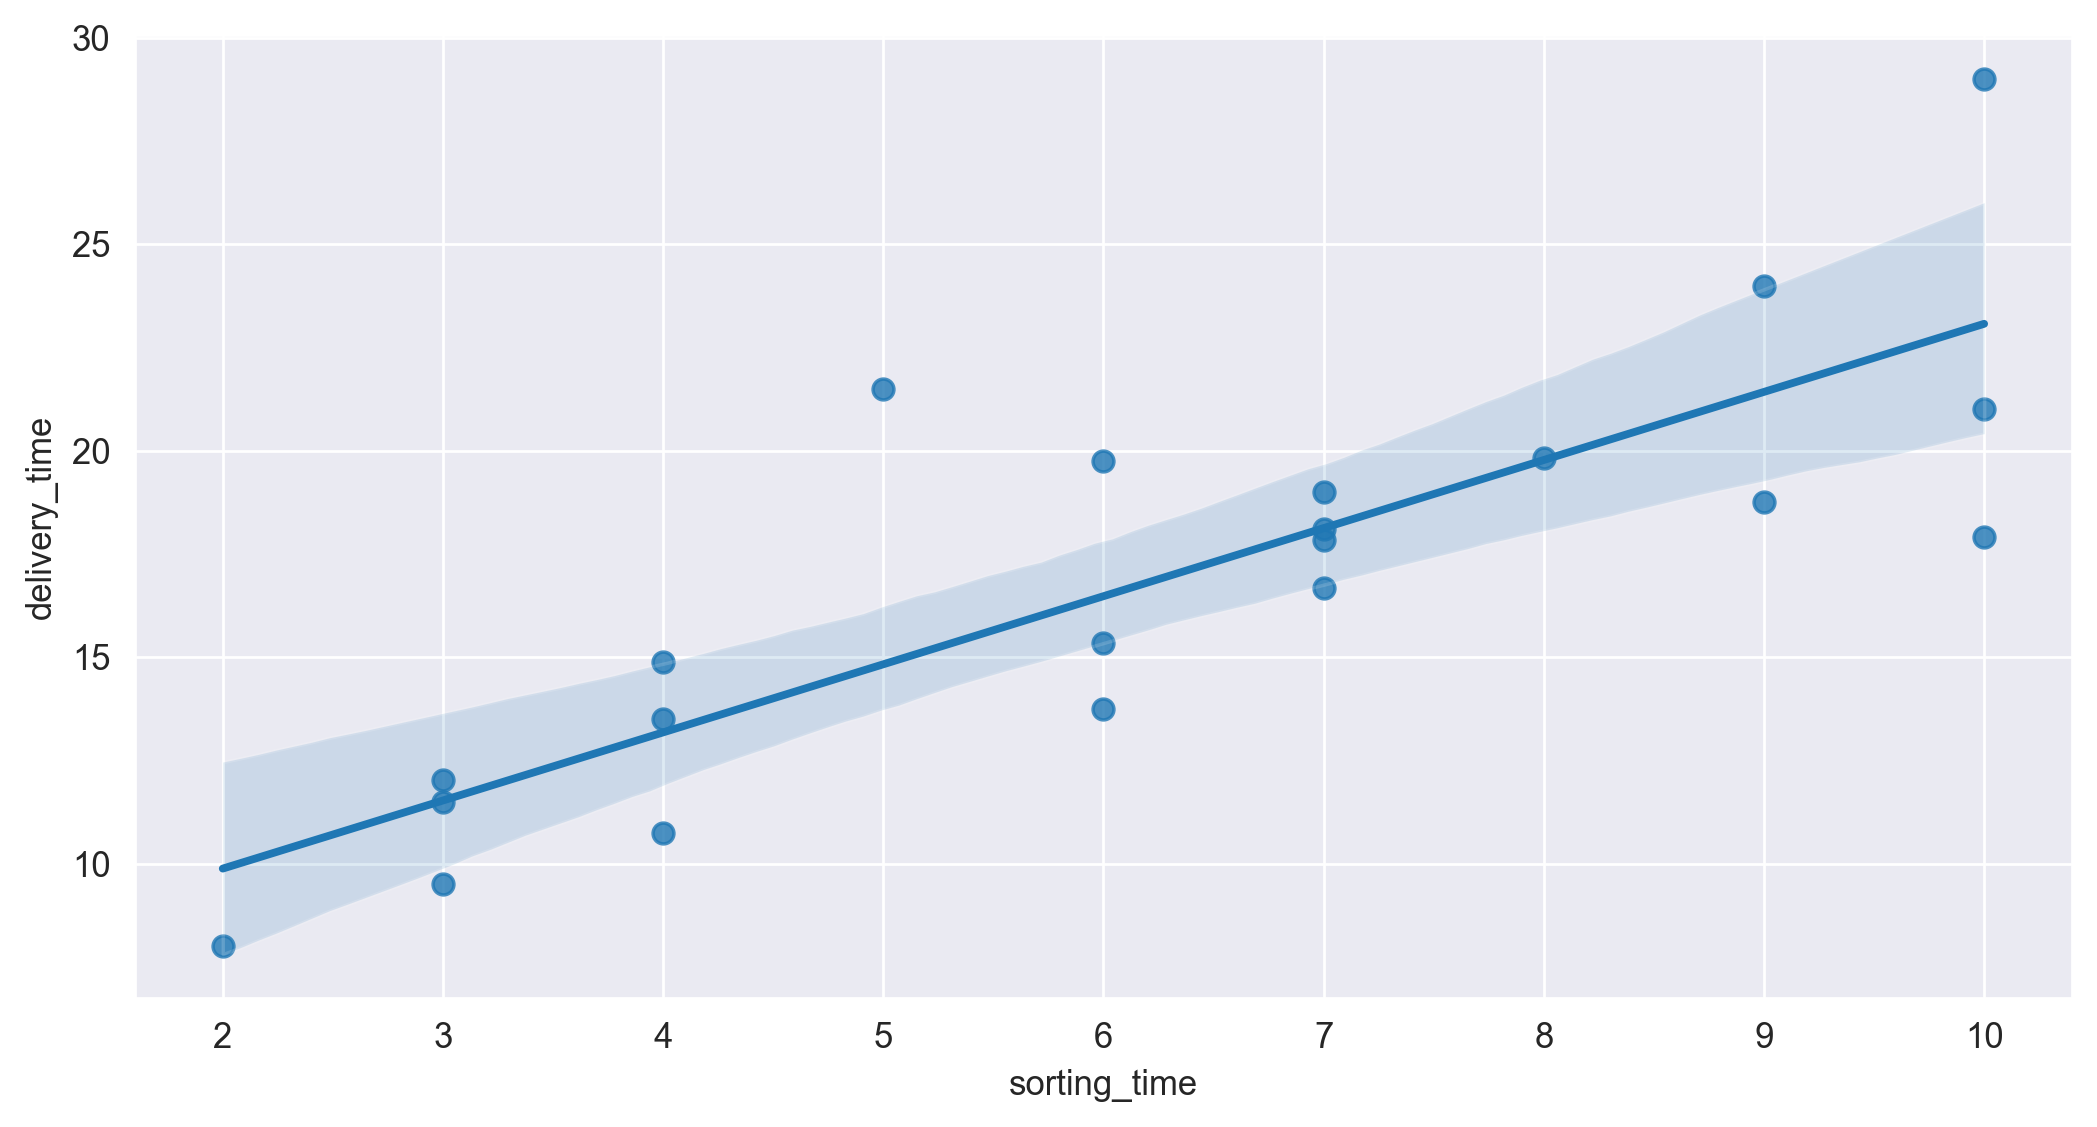

In [14]:
sns.regplot(x=df1["sorting_time"], y=df1["delivery_time"]);

# As you can see above
There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

# Step 5. Checking for Homoscedasticity or Hetroscedasticity

Text(0.5, 1.0, 'Hetroscedasticit')

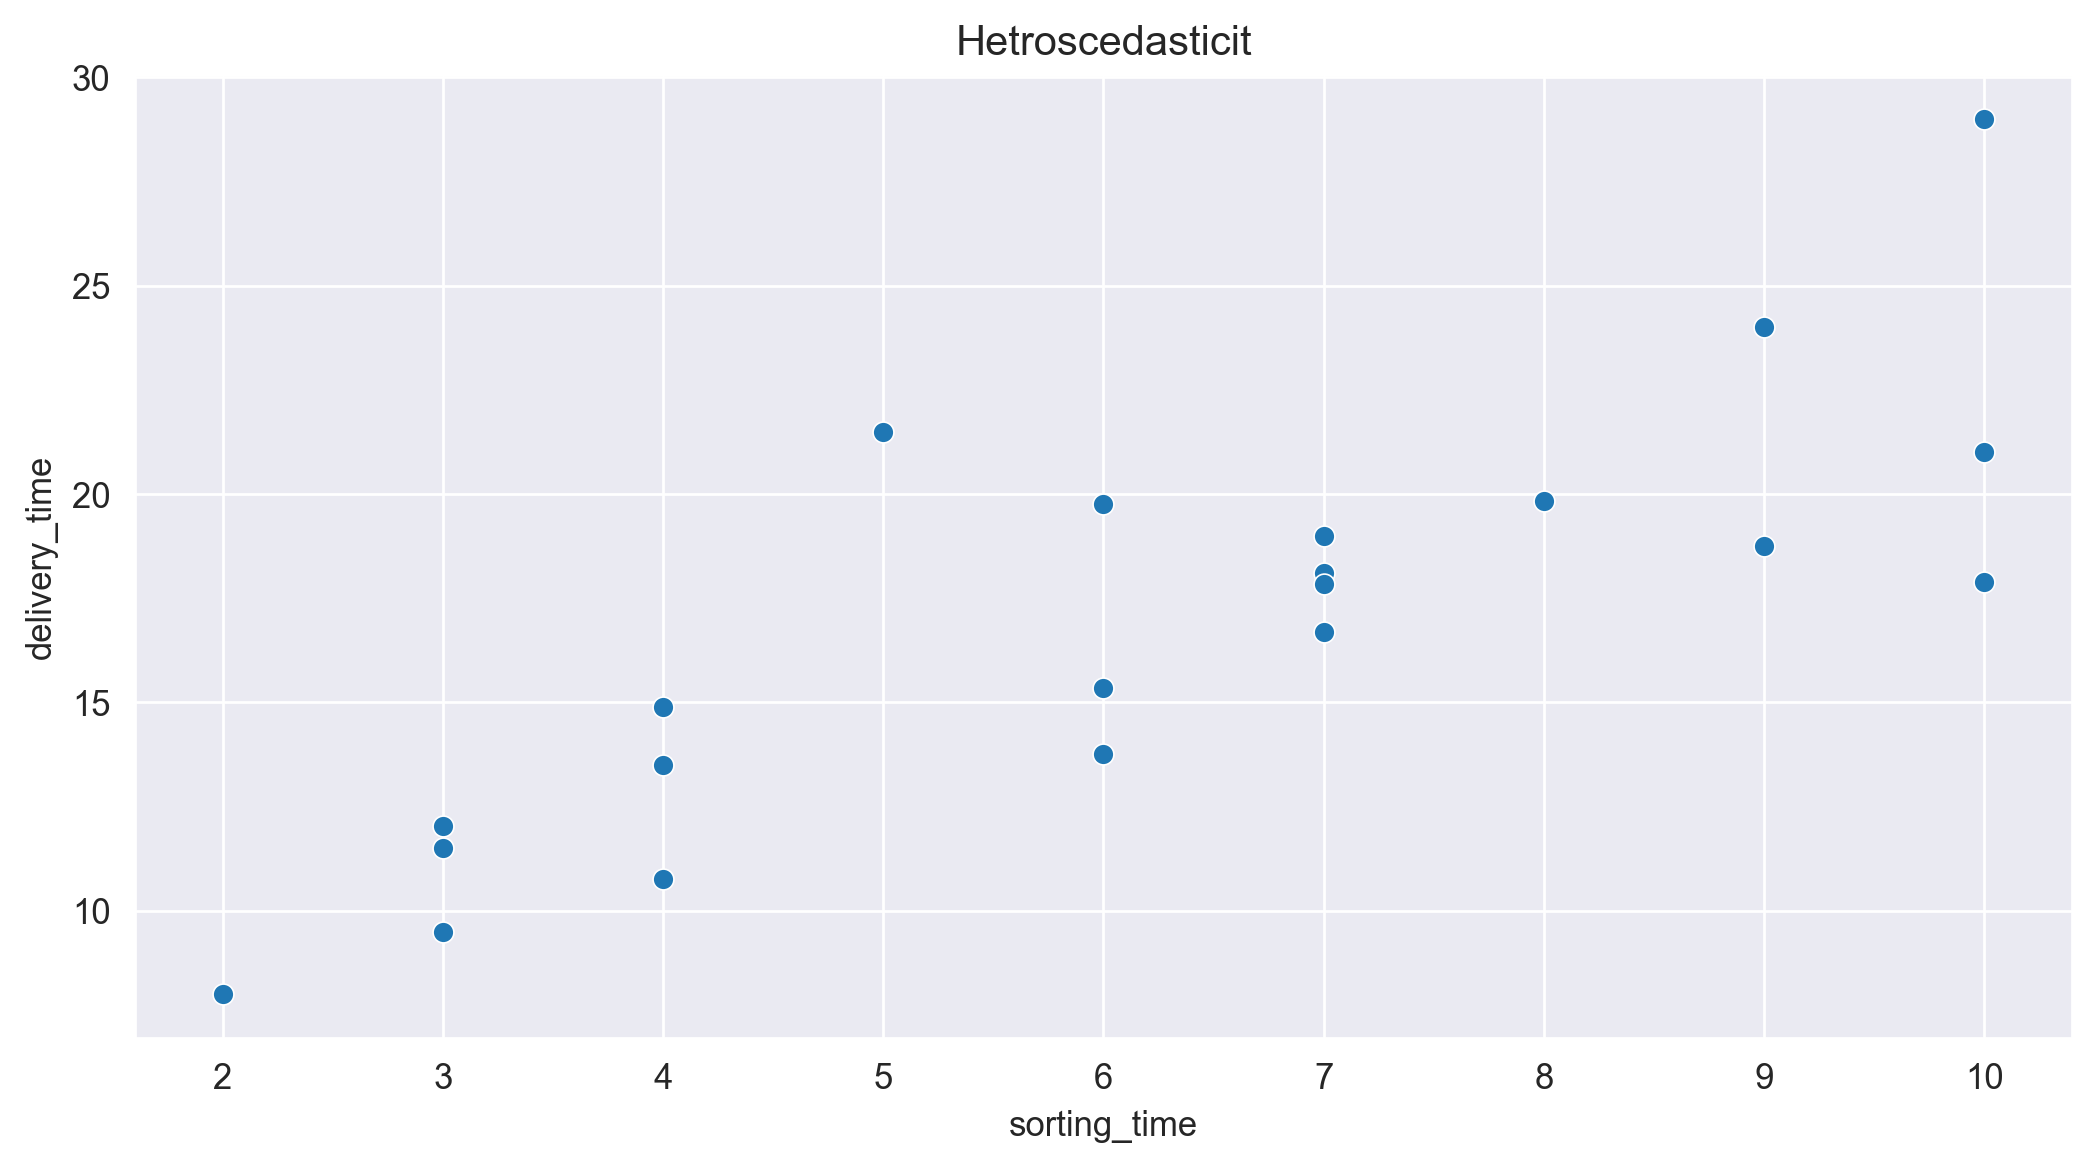

In [15]:
sns.scatterplot(x=df1["sorting_time"], y=df1["delivery_time"])
plt.title("Hetroscedasticit")

In [16]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

# As you can see in above graph
1. It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way
2. The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

# Step 6. Feature Engineering

Trying different transformation of data to estimate normal distribution and to remove any skewness

Text(0.5, 1.0, 'After Transformation')

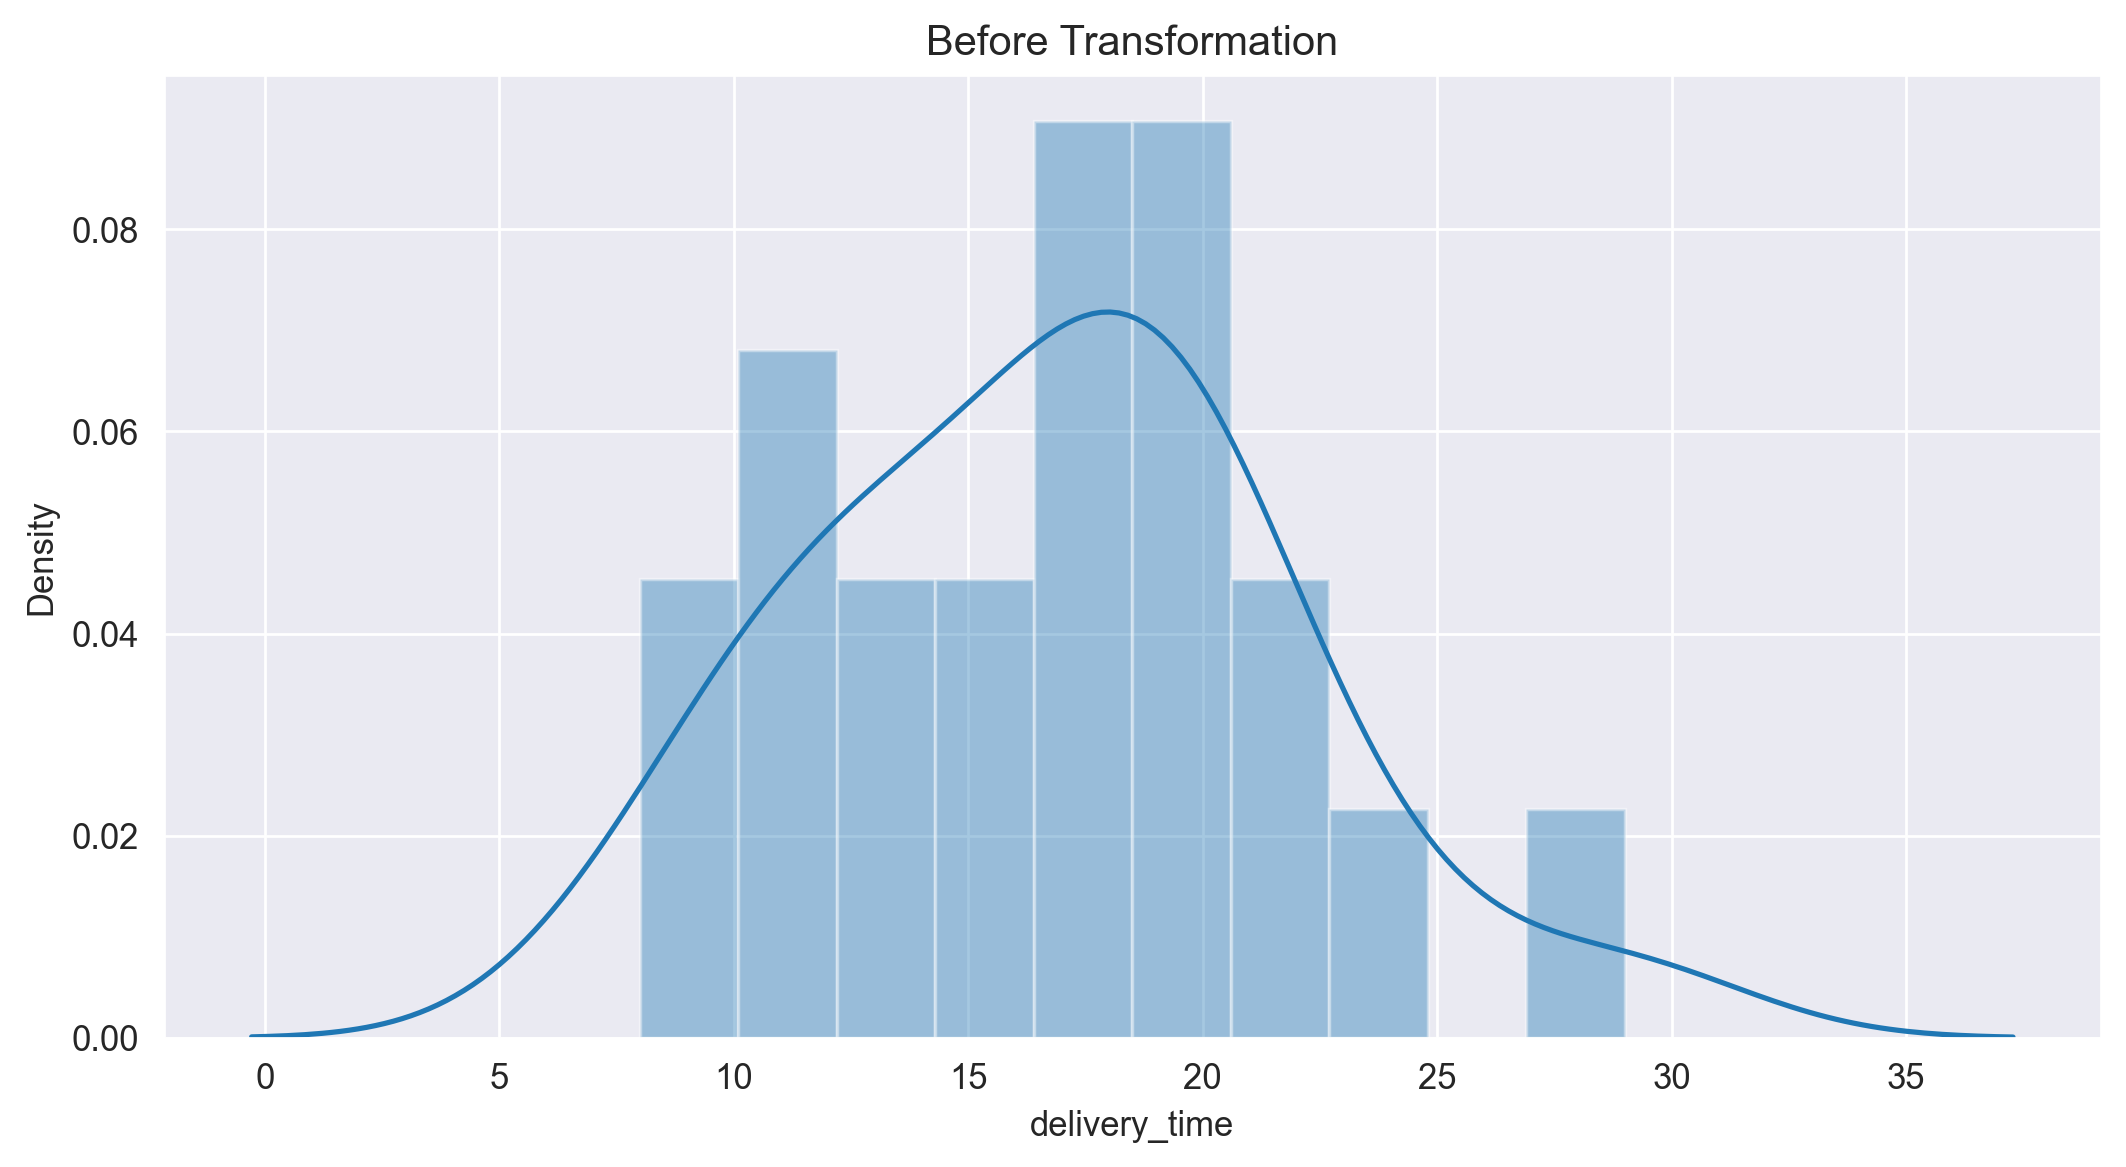

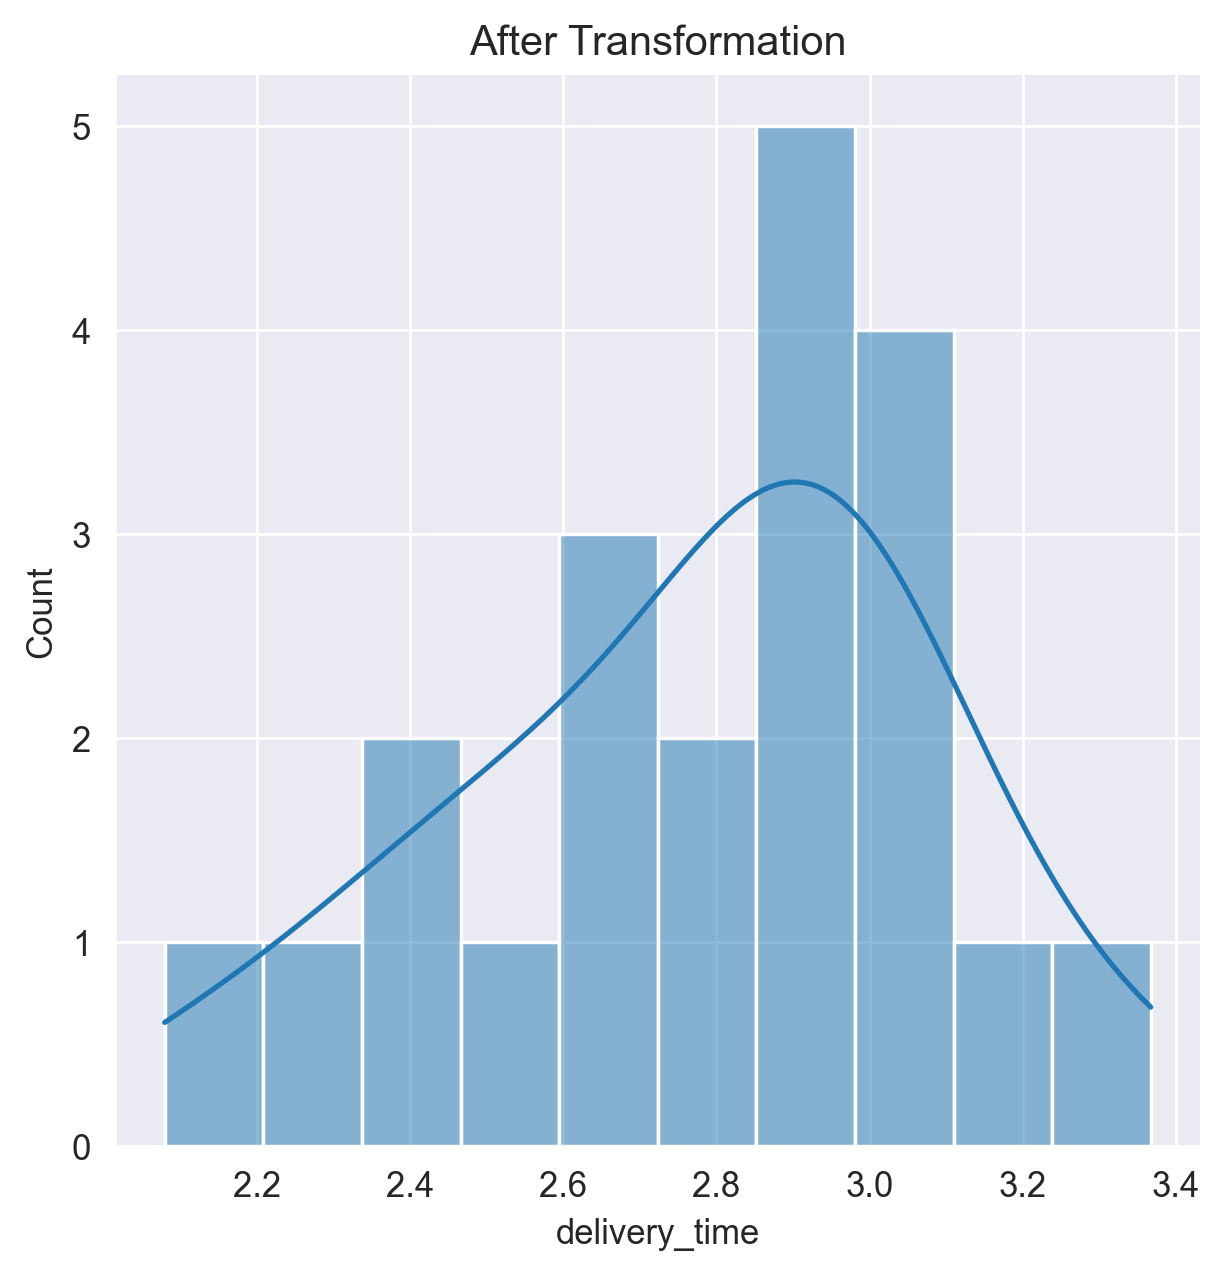

In [17]:
sns.distplot(df1['delivery_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df1['delivery_time']),bins = 10, kde = True)
plt.title('After Transformation')

# As you can see
1. How log transformation affects the data and it scales the values down.
2. Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

In [18]:
smf.qqplot(df1["delivery_time"], line= "r")
plt.title ("No transformation")
smf.qqplot(np.sqrt(df1["delivery_time"]), line= "r")
plt.title ("Sqrt Transformation")
smf.qqplot(np.log(df1["delivery_time"]), line = "r")
plt.title ("Log Transformation")

AttributeError: module 'statsmodels.formula.api' has no attribute 'qqplot'

In [ ]:
smf.qqplot(df1["sorting_time"], line= "r")
plt.title ("No transformation")
smf.qqplot(np.sqrt(df1["sorting_time"]), line= "r")
plt.title ("Sqrt Transformation")
smf.qqplot(np.log(df1["sorting_time"]), line = "r")
plt.title ("Log Transformation")

# Note:

we only Perform any data transformation when the data is skewed or not normal

# Step 7 . Fitting a Linear Regression Model

#Using Ordinary least squares (OLS) regression 

In [19]:
model = smf.ols('delivery_time~sorting_time', data = df1).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        18:05:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can notice in the above model
1. The R-squared and Adjusted R-squared scores are still below 0.85.
2. (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
3. Lets Try some data transformation to check whether these scores can get any higher than this.

In [21]:
model1 = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 20 Feb 2024   Prob (F-statistic):           8.48e-07
Time:                            18:06:03   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can notice in the above model

After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.

Lets Try other data transformation to check whether these scores can get any higher than this.

In [22]:
model2 = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 20 Feb 2024   Prob (F-statistic):           1.60e-07
Time:                           18:06:09   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can notice in the above model

After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model

Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.

Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

# Step 8. Residual Analysis.

# Test for Normality of Residuals (Q-Q Plot)

Text(0.5, 1.0, 'Normal Q-Q plot of residuals of Model without any data transformation')

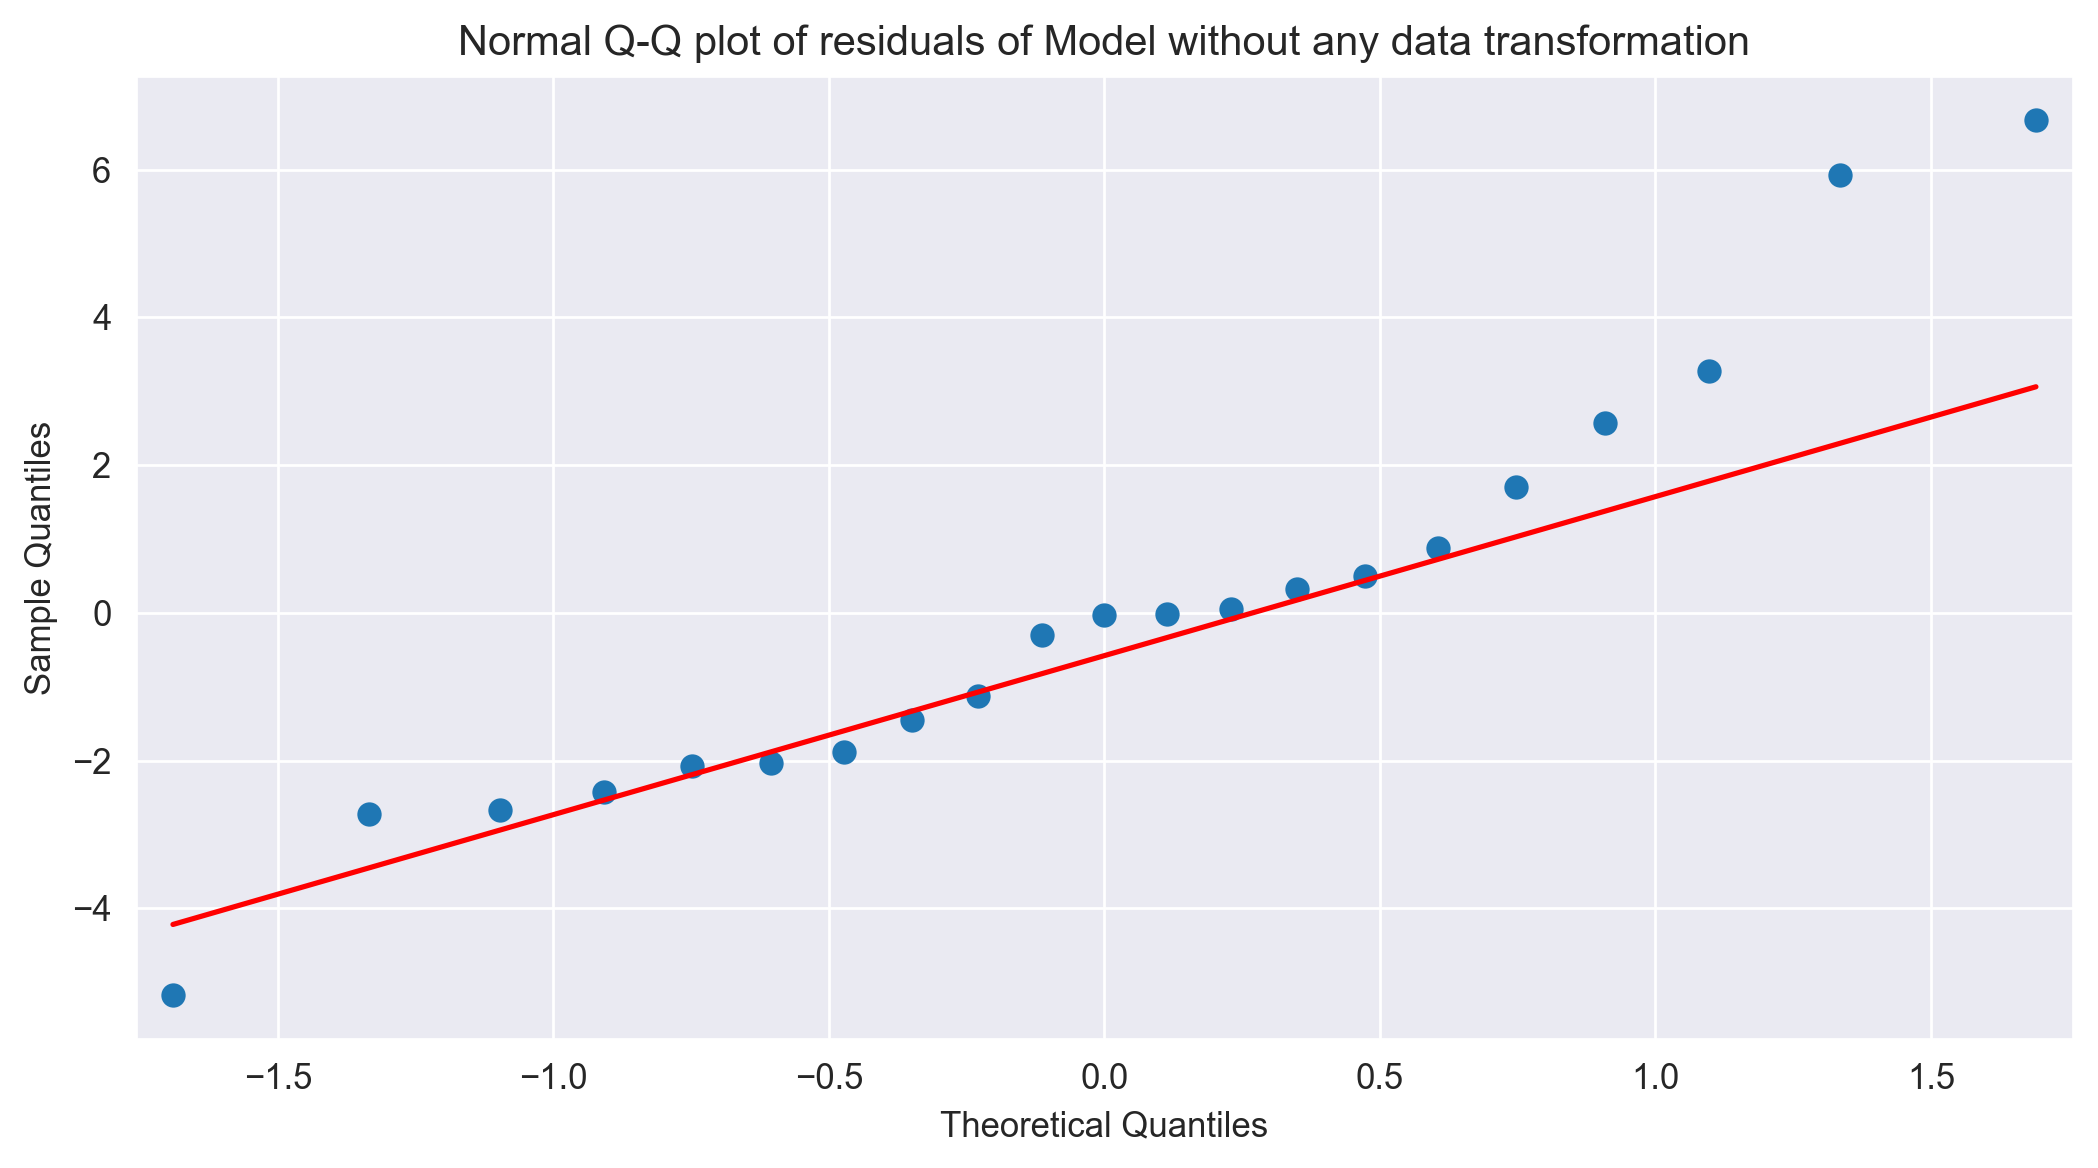

In [29]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')

Text(0.5, 1.0, 'Normal Q-Q plot of residuals of Model with Log transformation')

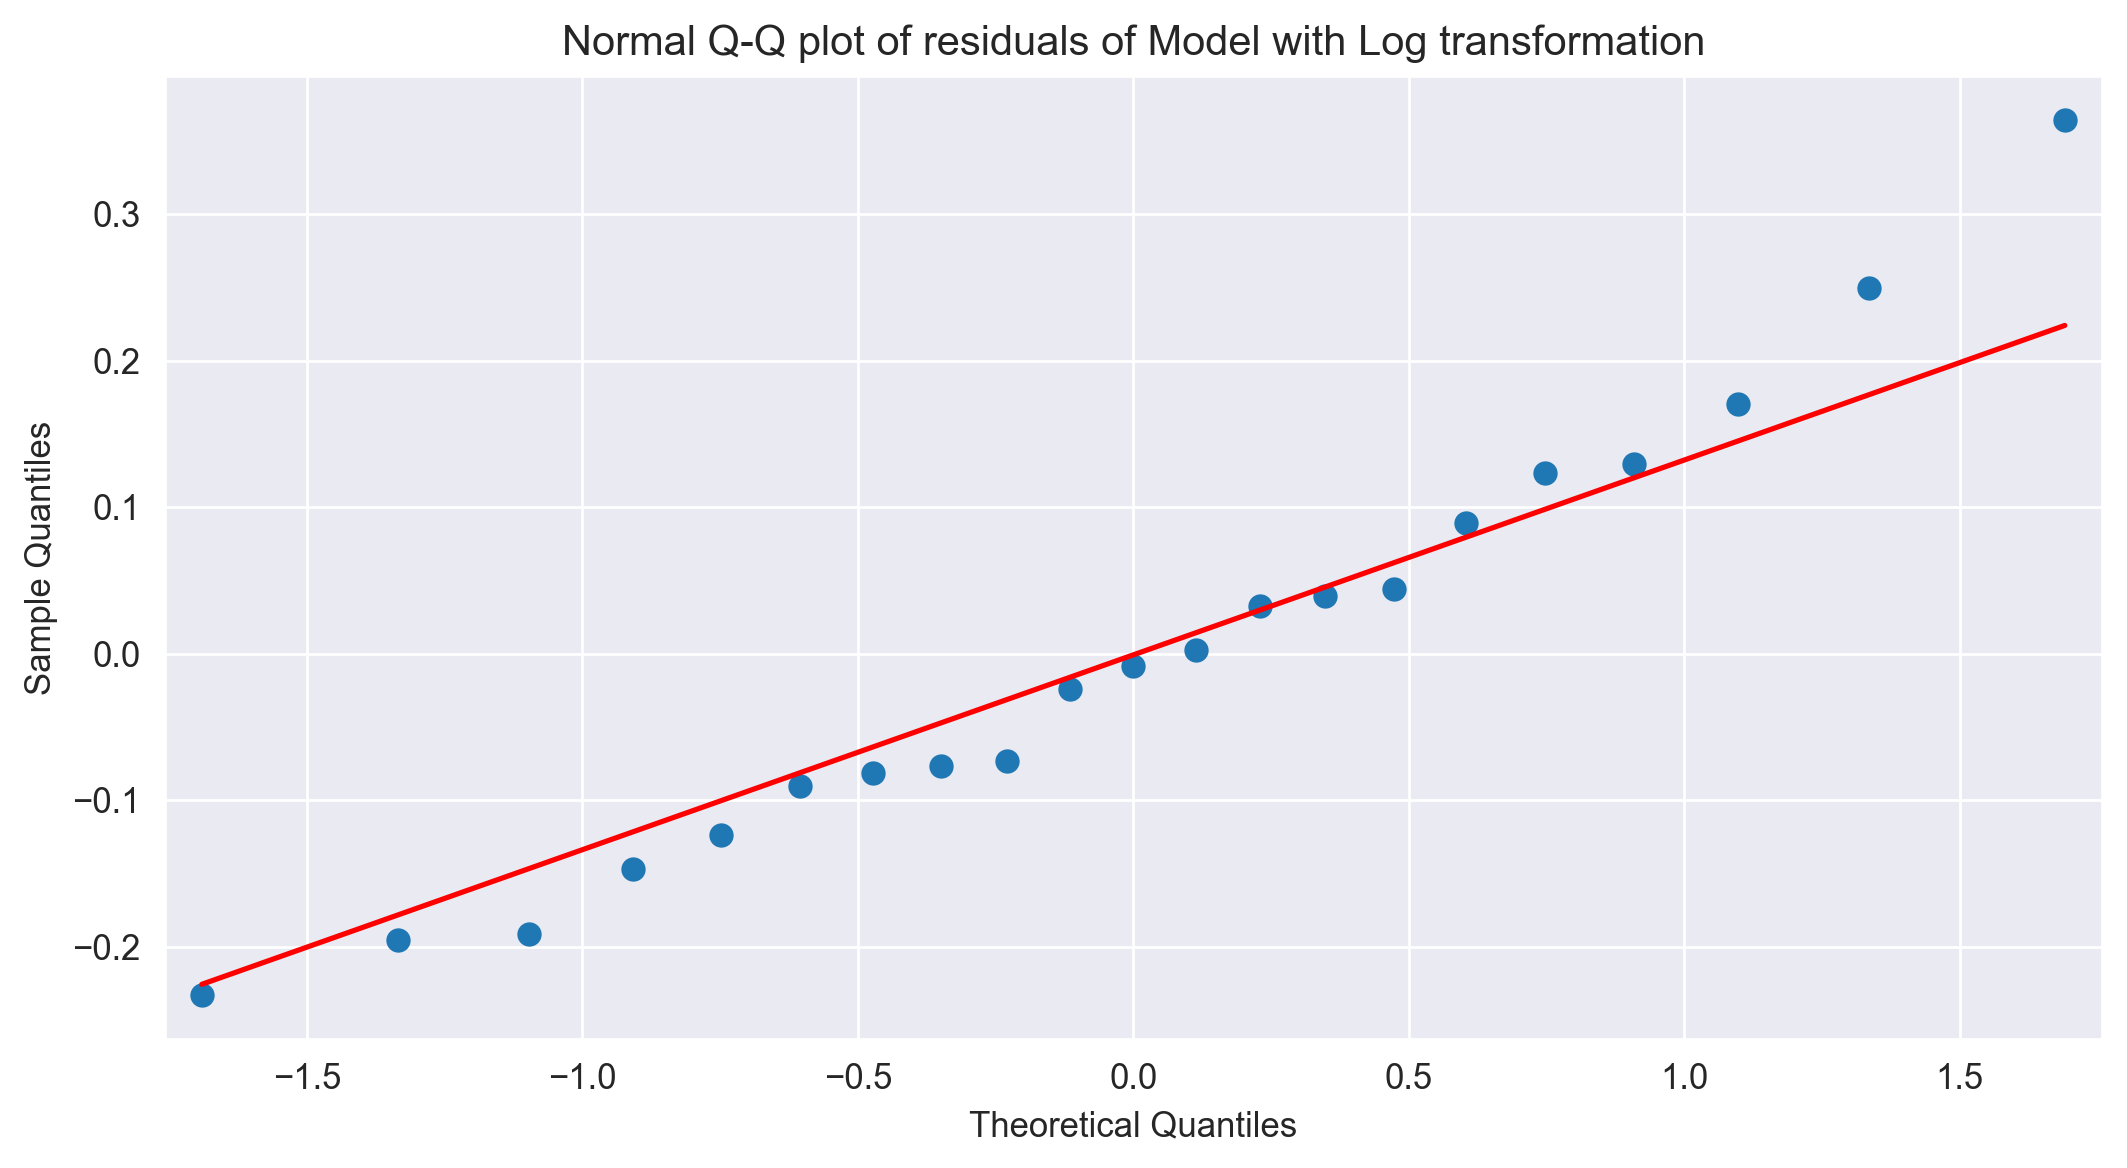

In [25]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')

# As you can notice in the above plots

Both The Model have slightly different plots

The first model is right skewed and doesn't follow normal distribution

The second model after log-transformation follows normal distributon with less skewness than first model

# Step 9. Predicting values from Model with Log Transformation on the Data¶

In [27]:
predicted = pd.DataFrame()
predicted['sorting_time'] = df1.sorting_time
predicted['delivery_time'] = df1.delivery_time
predicted['Predicted_delivery_time'] = pd.DataFrame(np.exp(model2.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,Predicted_delivery_time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


# Predicitng from Original Model without any data transformation

In [28]:
predicted = pd.DataFrame()
predicted['sorting_time'] = df1.sorting_time
predicted['delivery_time'] = df1.delivery_time
predicted['Predicted_delivery_time'] = pd.DataFrame(model.predict(predicted.sorting_time))
predicted

,sorting_time,delivery_time,Predicted_delivery_time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
